In [101]:
# https://www.kaggle.com/code/hellbuoy/online-retail-k-means-hierarchical-clustering/notebook#Business-Goal

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans

In [102]:
df = pd.read_csv('./store_clean.csv')

df.head()

,Unnamed: 0,trans_date,acc_created_date,trans_id,user_id,brand,product_name,quantity,sub_total
0,0,2021-03-01 09:42:48,2021-03-01 09:39:28,INV-44477208-20195,6ae66dba4a,Geo Magazine,Geo Magazine 12 Month Printed Subscription,1,576000
1,1,2021-03-01 09:42:48,2021-03-01 09:39:28,INV-84260125-20195,6ae66dba4a,Insight Magazine,Insight Magazine 6 Month Printed Subscription,1,120000
2,2,2021-03-01 10:05:18,2021-03-01 05:10:49,INV-21702404-20196,fecd37e3fa,Kids Creativity Magazine,Kids Creativity Magazine 6 Month Printed Subsc...,1,145600
3,3,2021-03-01 15:58:35,2021-02-25 18:38:31,INV-46817248-20197,702981082e,Kids Magazine,Kids Magazine 6 Month Printed Subscription,1,291200
4,4,2021-03-01 16:19:54,2021-03-01 16:16:50,INV-47598177-20198,d1fbab7576,Kindergarten Magazine,Kindergarten Magazine 6 Month Printed Subscrip...,1,182000


In [103]:
df.shape

(5847, 9)

In [104]:
df.duplicated().value_counts()

False    5847
Name: count, dtype: int64

In [105]:
df.isnull().sum()

Unnamed: 0          0
trans_date          0
acc_created_date    0
trans_id            0
user_id             0
brand               0
product_name        0
quantity            0
sub_total           0
dtype: int64

In [106]:
df_rfm = df.copy()

df_rfm.drop(columns=['Unnamed: 0'], inplace=True)

df_rfm.head()

,trans_date,acc_created_date,trans_id,user_id,brand,product_name,quantity,sub_total
0,2021-03-01 09:42:48,2021-03-01 09:39:28,INV-44477208-20195,6ae66dba4a,Geo Magazine,Geo Magazine 12 Month Printed Subscription,1,576000
1,2021-03-01 09:42:48,2021-03-01 09:39:28,INV-84260125-20195,6ae66dba4a,Insight Magazine,Insight Magazine 6 Month Printed Subscription,1,120000
2,2021-03-01 10:05:18,2021-03-01 05:10:49,INV-21702404-20196,fecd37e3fa,Kids Creativity Magazine,Kids Creativity Magazine 6 Month Printed Subsc...,1,145600
3,2021-03-01 15:58:35,2021-02-25 18:38:31,INV-46817248-20197,702981082e,Kids Magazine,Kids Magazine 6 Month Printed Subscription,1,291200
4,2021-03-01 16:19:54,2021-03-01 16:16:50,INV-47598177-20198,d1fbab7576,Kindergarten Magazine,Kindergarten Magazine 6 Month Printed Subscrip...,1,182000


In [107]:
df_rfm.dtypes

trans_date          object
acc_created_date    object
trans_id            object
user_id             object
brand               object
product_name        object
quantity             int64
sub_total            int64
dtype: object

In [108]:
df_rfm['trans_date'] = pd.to_datetime(df_rfm['trans_date'])
df_rfm['acc_created_date'] = pd.to_datetime(df_rfm['acc_created_date'])

df_rfm.dtypes

trans_date          datetime64[ns]
acc_created_date    datetime64[ns]
trans_id                    object
user_id                     object
brand                       object
product_name                object
quantity                     int64
sub_total                    int64
dtype: object

In [109]:
monetary = df_rfm.groupby('user_id')['sub_total'].sum()

monetary.head()

user_id
001b5eddf7    591500
0023cedbf9      7000
0024ae4898    436800
002d8b5849    204750
003e99a26e    145600
Name: sub_total, dtype: int64

In [110]:
frequency = df_rfm.groupby('user_id')['trans_id'].count().reset_index()

frequency.sort_values('trans_id', ascending=False).head()

,user_id,trans_id
2418,9efd34ffe5,21
602,278e551675,15
1868,7a8310aa9f,14
2492,a491801c2d,14
1677,6fce2e62f1,13


In [111]:
recency = df_rfm.copy()
recency = recency.sort_values(['user_id', 'trans_date'])

recency = recency.groupby(['user_id', 'trans_date'])['sub_total'].sum().reset_index()

recency['diff_date'] = recency.groupby('user_id')['trans_date'].diff().dt.days
recency['diff_date'] = recency['diff_date'].fillna(0)
recency['diff_date'] = np.abs(recency['diff_date'])

recency = recency.groupby('user_id')['diff_date'].max().reset_index()

recency['diff_date'] = recency['diff_date'].astype('int64')

recency = recency[['user_id', 'diff_date']]

recency.head()

,user_id,diff_date
0,001b5eddf7,0
1,0023cedbf9,0
2,0024ae4898,0
3,002d8b5849,0
4,003e99a26e,0


In [112]:
df[df['user_id'].isin(['f50ce91bd7', '05389fd9c2'])]

,Unnamed: 0,trans_date,acc_created_date,trans_id,user_id,brand,product_name,quantity,sub_total
3542,3542,2022-03-12 16:41:13,2022-03-17 20:54:38,INV-82520171-28202,05389fd9c2,Kindergarten Creativity Magazine,Kindergarten Creativity Magazine 6 Month Print...,1,84000
3543,3543,2022-03-12 16:41:13,2022-03-17 20:54:38,INV-45353298-28202,05389fd9c2,Kids Magazine,Kids Magazine 6 Month Printed Subscription,1,291200
3549,3549,2022-03-13 10:42:04,2022-03-14 17:26:15,INV-21809026-28208,f50ce91bd7,Kids Magazine,Kids Magazine 12 Month Printed Subscription,1,582400


In [113]:
df_rfm = pd.merge(monetary, frequency, on='user_id', how='inner')
df_rfm = pd.merge(df_rfm, recency, on='user_id', how='inner')

df_rfm = df_rfm.rename(columns={'sub_total': 'monetary', 'trans_id': 'frequency', 'diff_date': 'recency'})

df_rfm.head()

,user_id,monetary,frequency,recency
0,001b5eddf7,591500,2,0
1,0023cedbf9,7000,1,0
2,0024ae4898,436800,2,0
3,002d8b5849,204750,1,0
4,003e99a26e,145600,1,0


In [114]:
df_rfm.shape

(3900, 4)

In [115]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_rfm[['monetary', 'frequency', 'recency']])

df_scaled

array([[ 0.43878721,  0.4416056 , -0.38293538],
       [-0.93476993, -0.4402489 , -0.38293538],
       [ 0.07524694,  0.4416056 , -0.38293538],
       ...,
       [ 0.75955804, -0.4402489 , -0.38293538],
       [-0.88542057, -0.4402489 , -0.38293538],
       [-0.09583084, -0.4402489 , -0.38293538]])

In [116]:
df_scaled.shape

(3900, 3)

In [117]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['monetary', 'frequency', 'recency']

df_scaled.head()

,monetary,frequency,recency
0,0.438787,0.441606,-0.382935
1,-0.934770,-0.440249,-0.382935
2,0.075247,0.441606,-0.382935
3,-0.470063,-0.440249,-0.382935
4,-0.609064,-0.440249,-0.382935


In [118]:
df_scaled['user_id'] = df_rfm['user_id']

df_scaled.head()

,monetary,frequency,recency,user_id
0,0.438787,0.441606,-0.382935,001b5eddf7
1,-0.934770,-0.440249,-0.382935,0023cedbf9
2,0.075247,0.441606,-0.382935,0024ae4898
3,-0.470063,-0.440249,-0.382935,002d8b5849
4,-0.609064,-0.440249,-0.382935,003e99a26e


In [119]:
df_scaled.describe()

,monetary,frequency,recency
count,3900.000000,3900.000000,3900.000000
mean,0.000000,0.000000,-0.000000
std,1.000128,1.000128,1.000128
min,-0.945580,-0.440249,-0.382935
25%,-0.566295,-0.440249,-0.382935
50%,-0.246229,-0.440249,-0.382935
75%,0.331864,0.441606,-0.382935
max,13.606371,17.196841,6.306973


In [120]:
pca = PCA(n_components=2)

result = pca.fit_transform(df_scaled[['monetary', 'frequency', 'recency']])

df_pca = pd.DataFrame(result)
df_pca.columns = ['pca1', 'pca2']

df_pca.head()

,pca1,pca2
0,0.306533,0.660877
1,-1.023379,-0.185834
2,0.091216,0.543282
3,-0.748143,-0.035513
4,-0.830470,-0.080477


In [121]:
pca = PCA(n_components=2)

result = pca.fit_transform(df_scaled[['monetary', 'frequency', 'recency']])

df_pca = pd.DataFrame(result)
df_pca.columns = ['pca1', 'pca2']

df_pca.head()

,pca1,pca2
0,0.306533,0.660877
1,-1.023379,-0.185834
2,0.091216,0.543282
3,-0.748143,-0.035513
4,-0.830470,-0.080477


Text(0, 0.5, '2nd Principal Component')

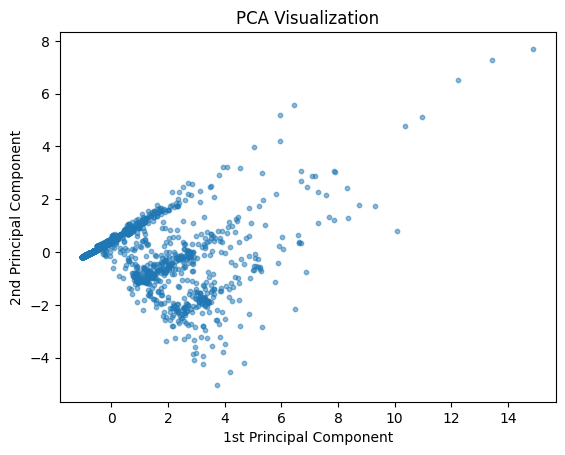

In [122]:
plt.scatter(x=df_pca['pca1'], y=df_pca['pca2'], alpha=0.5, s=10)

plt.title('PCA Visualization')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')

In [123]:
param = {
  'n_init': [2, 3, 4, 5, 6, 7, 8, 9, 10],
}

result = pd.DataFrame(columns=['K', 'Score', 'SilhouetteScore'])

loop = 0

inertia = []

for n in param['n_init']:
  km = KMeans(n_init=n, init='k-means++') 
  km.fit(df_pca)

  ss = silhouette_score(df_pca, km.labels_)

  inertia.append(km.inertia_)

  result.loc[loop] = [n, km.inertia_, ss]
        
  loop += 1 

In [124]:
result = result.sort_values(by='SilhouetteScore', ascending=False)

result

,K,Score,SilhouetteScore
4,6.000000,856.650109,0.644318
8,10.000000,843.092905,0.638470
0,2.000000,842.906884,0.638358
2,4.000000,842.906884,0.638358
3,5.000000,842.906884,0.638358
1,3.000000,843.199422,0.638312
5,7.000000,843.199422,0.638312
7,9.000000,842.922209,0.638227
6,8.000000,843.169412,0.638055


In [125]:
n_cluster = int(result.iloc[0]['K'])

n_cluster

6

In [126]:
# km = KMeans(n_clusters=n_cluster, max_iter=max_iter)
km = KMeans(n_clusters=n_cluster, init='k-means++')
km.fit(df_pca)

c:\Users\KG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6)

In [127]:
centroid = km.cluster_centers_

centroid

array([[-0.71387867, -0.01726934],
       [ 1.67728628, -0.71599874],
       [ 0.32356216,  0.61402325],
       [ 8.52179104,  3.3006133 ],
       [ 4.08001586,  0.87913294],
       [ 3.12062129, -2.15880962]])

In [128]:
df_pca.head()

,pca1,pca2
0,0.306533,0.660877
1,-1.023379,-0.185834
2,0.091216,0.543282
3,-0.748143,-0.035513
4,-0.830470,-0.080477


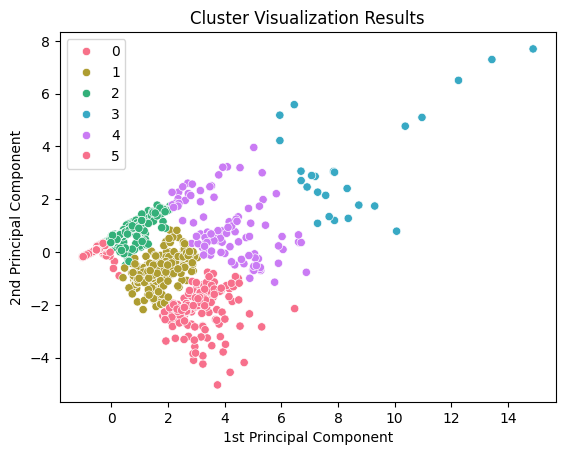

In [129]:
# plt.scatter(df_pca['pca1'], df_pca['pca2'], c=km.labels_, s=10, alpha=0.5)

sns.scatterplot(df_pca, x='pca1', y='pca2', hue=km.labels_, palette='husl')

plt.title('Cluster Visualization Results')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')

plt.legend()

In [130]:
km.labels_

array([2, 0, 2, ..., 2, 0, 0])

In [131]:
df_rfm['label'] = km.labels_

df_rfm.head()

,user_id,monetary,frequency,recency,label
0,001b5eddf7,591500,2,0,2
1,0023cedbf9,7000,1,0,0
2,0024ae4898,436800,2,0,2
3,002d8b5849,204750,1,0,0
4,003e99a26e,145600,1,0,0


In [132]:
df_rfm.shape

(3900, 5)

In [133]:
df_scaled['label'] = km.labels_

df_scaled.head()

,monetary,frequency,recency,user_id,label
0,0.438787,0.441606,-0.382935,001b5eddf7,2
1,-0.934770,-0.440249,-0.382935,0023cedbf9,0
2,0.075247,0.441606,-0.382935,0024ae4898,2
3,-0.470063,-0.440249,-0.382935,002d8b5849,0
4,-0.609064,-0.440249,-0.382935,003e99a26e,0


    label   variable     value
0       0    recency -0.380114
1       1    recency  1.547558
2       2    recency -0.345118
3       3    recency  2.020301
4       4    recency  1.546614
5       5    recency  3.510382
6       0  frequency -0.420307
7       1  frequency  0.868609
8       2  frequency  0.343622
9       3  frequency  6.826232
10      4  frequency  2.933059
11      5  frequency  0.790123
12      0   monetary -0.434565
13      1   monetary  0.527025
14      2   monetary  0.529074
15      3   monetary  5.751400
16      4   monetary  2.543615
17      5   monetary  1.207355


<Axes: xlabel='variable', ylabel='value'>

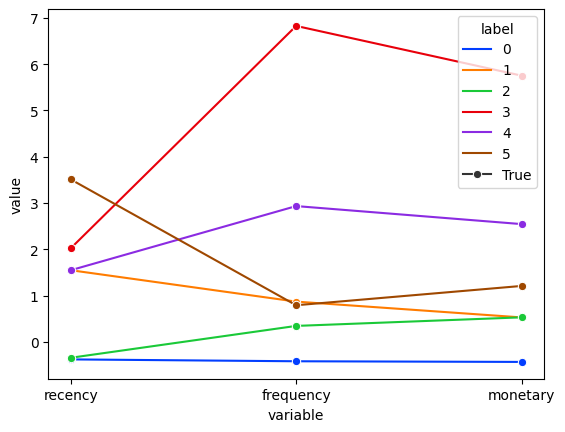

In [134]:
df_melt = df_scaled[['monetary', 'recency', 'frequency', 'label']].groupby(by='label').agg("mean").reset_index()

df_melt = df_melt.melt(id_vars=['label'], value_vars=['recency', 'frequency', 'monetary', 'label'])

print(df_melt)

sns.lineplot(df_melt, x='variable', y='value', hue='label', palette='bright', markers='o', style=True)

In [135]:
df_melt = df_scaled[['monetary', 'recency', 'frequency', 'label']].groupby(by='label').agg(["min", "max", "mean"]).reset_index()

df_melt

label  monetary                       recency                    frequency  \
              min       max      mean       min      max      mean       min   
0     0 -0.945580  0.486962 -0.434565 -0.382935 0.978727 -0.380114 -0.440249   
1     1 -0.904220  2.714733  0.527025  0.633378 2.656138  1.547558  0.441606   
2     2 -0.927532  3.379304  0.529074 -0.382935 0.732049 -0.345118 -0.440249   
3     3 -0.511587 13.606371  5.751400 -0.382935 4.639429  2.020301  3.087169   
4     4 -0.820209  6.162608  2.543615 -0.382935 4.264479  1.546614  0.441606   
5     5 -0.885421  3.809818  1.207355  2.517998 6.306973  3.510382  0.441606   

                       
        max      mean  
0  0.441606 -0.420307  
1  3.087169  0.868609  
2  3.969024  0.343622  
3 17.196841  6.826232  
4  9.260151  2.933059  
5  2.205315  0.790123

Text(0, 0.5, 'Recency')

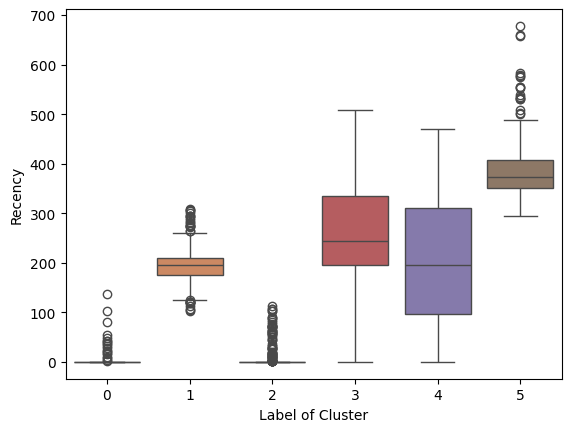

In [136]:
ax = sns.boxplot(data=df_rfm, x='label', y='recency', hue='label', palette='deep', legend=False)

ax.set_xlabel('Label of Cluster')
ax.set_ylabel('Recency')

Text(0, 0.5, 'Frequency')

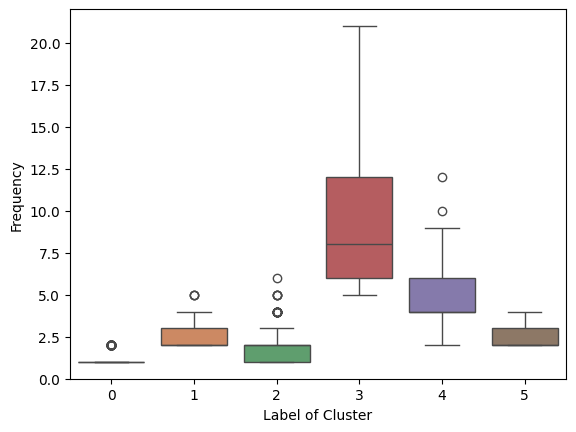

In [137]:
ax = sns.boxplot(data=df_rfm, x='label', y='frequency', hue='label', palette='deep', legend=False)

ax.set_xlabel('Label of Cluster')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Monetary')

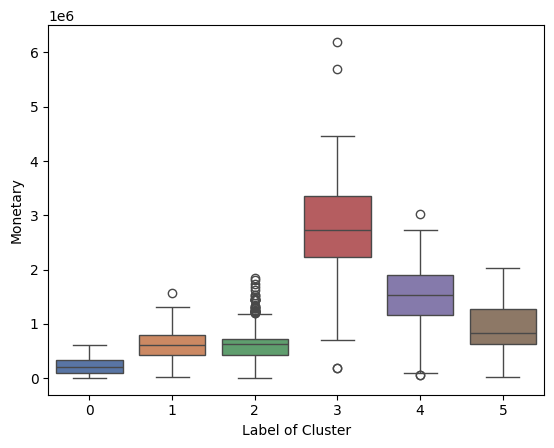

In [138]:
ax = sns.boxplot(data=df_rfm, x='label', y='monetary', hue='label', palette='deep', legend=False)

ax.set_xlabel('Label of Cluster')
ax.set_ylabel('Monetary')

In [139]:
df_rfm.head()

,user_id,monetary,frequency,recency,label
0,001b5eddf7,591500,2,0,2
1,0023cedbf9,7000,1,0,0
2,0024ae4898,436800,2,0,2
3,002d8b5849,204750,1,0,0
4,003e99a26e,145600,1,0,0


In [153]:
df_rfm['label'].value_counts()

label
0    2609
2     711
1     285
5     167
4     103
3      25
Name: count, dtype: int64

In [155]:
df_rfm[['monetary', 'recency', 'frequency', 'label']].groupby(by='label').agg(["mean"]).reset_index()

,label,monetary,recency,frequency
,,mean,mean,mean
0,0,219856.096205,0.285933,1.022614
1,1,629048.315789,195.649123,2.484211
2,2,629920.309423,3.832630,1.888889
3,3,2852215.600000,243.560000,9.240000
4,4,1487182.961165,195.553398,4.825243
5,5,918554.371257,394.574850,2.395210


In [140]:
df_rfm = df_rfm.merge(df_scaled[['user_id', 'label']], on='user_id')

df_rfm.head()

,user_id,monetary,frequency,recency,label_x,label_y
0,001b5eddf7,591500,2,0,2,2
1,0023cedbf9,7000,1,0,0,0
2,0024ae4898,436800,2,0,2,2
3,002d8b5849,204750,1,0,0,0
4,003e99a26e,145600,1,0,0,0


In [141]:
df_rfm = df_rfm.rename(columns={'label_x': 'label'})

df_rfm.head()

,user_id,monetary,frequency,recency,label,label_y
0,001b5eddf7,591500,2,0,2,2
1,0023cedbf9,7000,1,0,0,0
2,0024ae4898,436800,2,0,2,2
3,002d8b5849,204750,1,0,0,0
4,003e99a26e,145600,1,0,0,0


In [142]:
df_rfm = df_rfm.drop(columns=['label_y'])

df_rfm.head()

,user_id,monetary,frequency,recency,label
0,001b5eddf7,591500,2,0,2
1,0023cedbf9,7000,1,0,0
2,0024ae4898,436800,2,0,2
3,002d8b5849,204750,1,0,0
4,003e99a26e,145600,1,0,0


In [143]:
pd.set_option('float_format', '{:f}'.format)

In [144]:
df_rfm[df_rfm['label'] == 0].describe()[['monetary', 'frequency', 'recency']]

,monetary,frequency,recency
count,2609.000000,2609.000000,2609.000000
mean,219856.096205,1.022614,0.285933
std,148364.016082,0.148698,4.436355
min,2400.000000,1.000000,0.000000
25%,94500.000000,1.000000,0.000000
50%,204750.000000,1.000000,0.000000
75%,324000.000000,1.000000,0.000000
max,612000.000000,2.000000,138.000000


In [145]:
df_rfm[df_rfm['label'] == 1].describe()[['monetary', 'frequency', 'recency']]

,monetary,frequency,recency
count,285.000000,285.000000,285.000000
mean,629048.315789,2.484211,195.649123
std,287164.877315,0.669188,37.947096
min,20000.000000,2.000000,103.000000
25%,420000.000000,2.000000,176.000000
50%,600600.000000,2.000000,195.000000
75%,792000.000000,3.000000,210.000000
max,1560000.000000,5.000000,308.000000


In [146]:
df_rfm[df_rfm['label'] == 2].describe()[['monetary', 'frequency', 'recency']]

,monetary,frequency,recency
count,711.000000,711.000000,711.000000
mean,629920.309423,1.888889,3.832630
std,286291.910757,0.731795,15.684975
min,10080.000000,1.000000,0.000000
25%,422100.000000,1.000000,0.000000
50%,618800.000000,2.000000,0.000000
75%,728000.000000,2.000000,0.000000
max,1842800.000000,6.000000,113.000000


In [147]:
df_rfm[df_rfm['label'] == 3].describe()[['monetary', 'frequency', 'recency']]

,monetary,frequency,recency
count,25.000000,25.000000,25.000000
mean,2852215.600000,9.240000,243.560000
std,1458493.345923,3.865230,124.402264
min,187080.000000,5.000000,0.000000
25%,2222800.000000,6.000000,195.000000
50%,2733400.000000,8.000000,245.000000
75%,3356400.000000,12.000000,335.000000
max,6194800.000000,21.000000,509.000000


In [148]:
df_rfm[df_rfm['label'] == 4].describe()[['monetary', 'frequency', 'recency']]

,monetary,frequency,recency
count,103.000000,103.000000,103.000000
mean,1487182.961165,4.825243,195.553398
std,606736.395124,1.647501,130.062860
min,55750.000000,2.000000,0.000000
25%,1166580.000000,4.000000,96.500000
50%,1534000.000000,4.000000,196.000000
75%,1903900.000000,6.000000,310.500000
max,3027200.000000,12.000000,471.000000


In [149]:
df_rfm[df_rfm['label'] == 5].describe()[['monetary', 'frequency', 'recency']]

,monetary,frequency,recency
count,167.000000,167.000000,167.000000
mean,918554.371257,2.395210,394.574850
std,384171.448920,0.630147,71.877105
min,28000.000000,2.000000,294.000000
25%,633500.000000,2.000000,351.500000
50%,837200.000000,2.000000,374.000000
75%,1274000.000000,3.000000,406.500000
max,2026000.000000,4.000000,678.000000


<Axes: xlabel='variable', ylabel='value'>

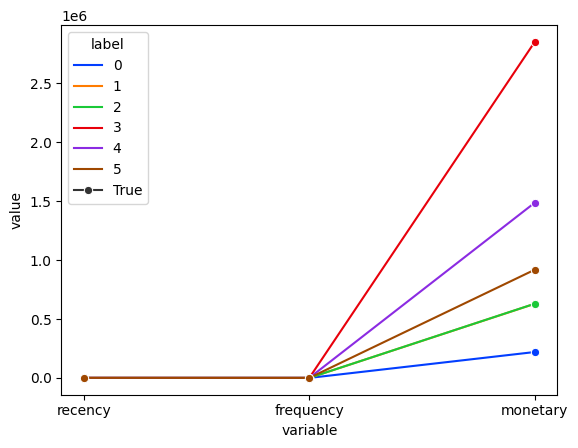

In [150]:
df_melt_new = df_rfm[['monetary', 'recency', 'frequency', 'label']].groupby(by='label').agg("mean").reset_index()

df_melt_new = df_melt_new.melt(id_vars=['label'], value_vars=['recency', 'frequency', 'monetary', 'label'])

sns.lineplot(df_melt_new, x='variable', y='value', hue='label', palette='bright', markers='o', style=True)